In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
ram_price =  pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
5,5,1973.00,3.993600e+05
6,6,1974.00,3.145730e+05
7,7,1975.00,4.218880e+05
8,8,1975.08,1.802240e+05
9,9,1975.25,6.758400e+04


In [3]:
ram_price.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


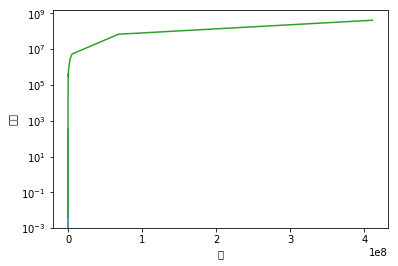

In [4]:
plt.semilogy(ram_price, ram_price)
plt.xlabel("년")
plt.ylabel("가격")
plt.show()

DecisionTreeRegressor 는 train set 범위 밖의 데이터에 대해서는 예측을 할 수 없습니다.

In [6]:
data_train = ram_price[ram_price['date'] < 2000]
data_test = ram_price[ram_price['date'] >= 2000]

In [7]:
x_train = data_train['date'][:,np.newaxis] # train_data 를 1열로 만듭니다.
y_train = np.log(data_train['date'])
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

##### test는 모든 데이터에 대해 적용합니다.

In [17]:
x_all = ram_price['date'].values.reshape(-1, 1) # x_all를 1열로 만듭니다.

In [20]:
pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree) # log 값 되돌리기

In [21]:
pred_lr = tree.predict(x_all)
price_lr = np.exp(pred_lr) # log 값 되돌리기

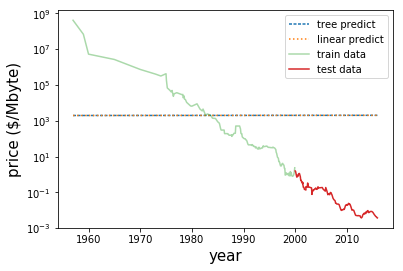

In [25]:
plt.semilogy(ram_price['date'], price_tree, label = 'tree predict', ls = '--', dashes = (2,1))
plt.semilogy(ram_price['date'], price_lr, label = 'linear predict', ls = ':')
plt.semilogy(data_train['date'], data_train["price"], label = 'train data', alpha=0.4)
plt.semilogy(data_test['date'], data_test["price"], label = 'test data')

plt.legend(loc=1)
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)
plt.show()